# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
df = pd.read_csv("data/Climate_Change_Indicators.csv") # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [45]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
year = "Year"
temperature = "Global Average Temperature (°C)"
co2 = "CO2 Concentration (ppm)"
sea_level = "Sea Level Rise (mm)"
area = "Arctic Ice Area (million km²)"

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [95]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
yearly_data = df.groupby(year)[[temperature,co2, sea_level, area]].mean().reset_index()
yearly_data.head()

yearly_data.sort_values(year)




,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

In [96]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
print("Descriptive Statistics:")
print(yearly_data.describe())


Descriptive Statistics:
              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min            


Visualizations:
Histograms analysis on Global Average Temperature:


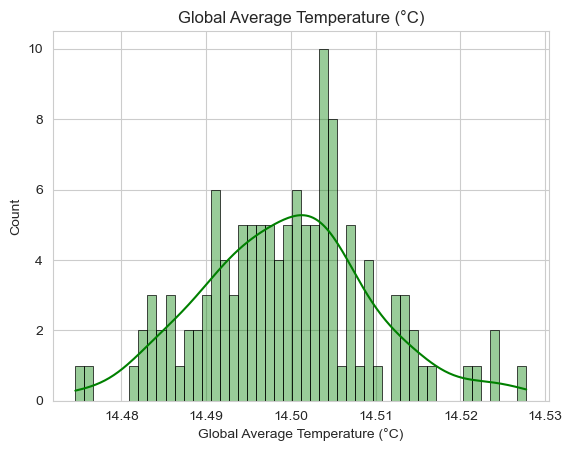

count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64


In [97]:
print("\nVisualizations:")  # You can use line plots, histograms, or density plots
print("Histograms analysis on Global Average Temperature:")
sns.histplot(yearly_data[temperature], kde=True, bins=50, color='green', edgecolor='black', linewidth=0.5, alpha=0.4)
plt.title(temperature)
plt.show()
print(yearly_data[temperature].describe())

Kde Density Plots on CO2 Concentration (ppm):


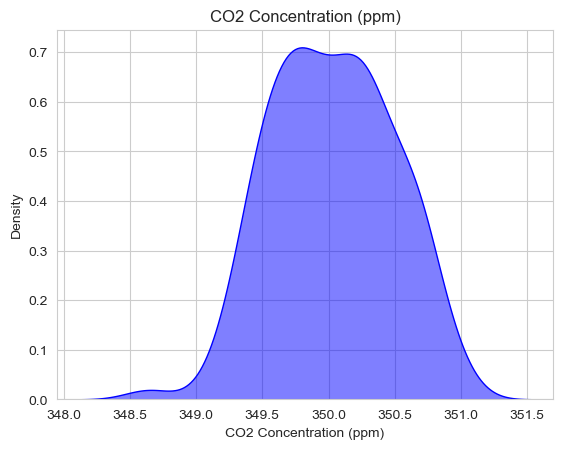

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


In [98]:
print("Kde Density Plots on CO2 Concentration (ppm):")
sns.kdeplot(data=yearly_data, x=co2, fill=True, color="blue", alpha=0.5)
plt.title(co2)
plt.show()
print(yearly_data[co2].describe())

Box Plot analysis on Sea Level Rise (mm):


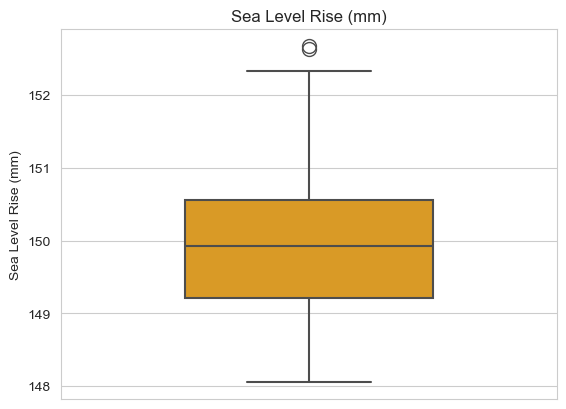

count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64


In [99]:
print("Box Plot analysis on Sea Level Rise (mm):")
sns.boxplot(data=yearly_data, y = sea_level,color="orange", linewidth=1.5, width=0.5, fliersize=10, saturation=0.7)
plt.title(sea_level)
plt.show()
print(yearly_data[sea_level].describe())

Violin Plot for Arctic Ice Area (million km2):


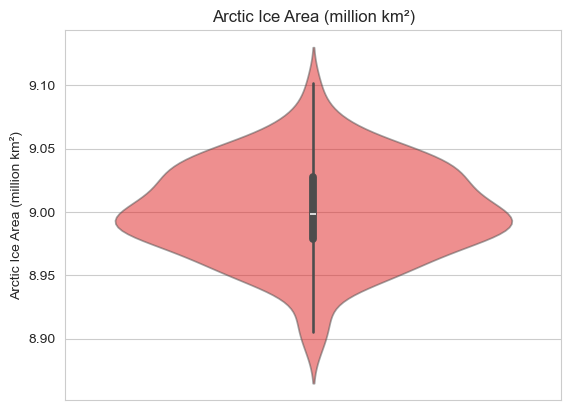

count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


In [100]:
print("Violin Plot for Arctic Ice Area (million km2):")
sns.violinplot(data=yearly_data, y=area, inner='box', color="red", alpha=0.5)
plt.title(area)
plt.show()
print(yearly_data[area].describe())


## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

Bivariate analysis on different variables against Year(Time):
Lineplot:


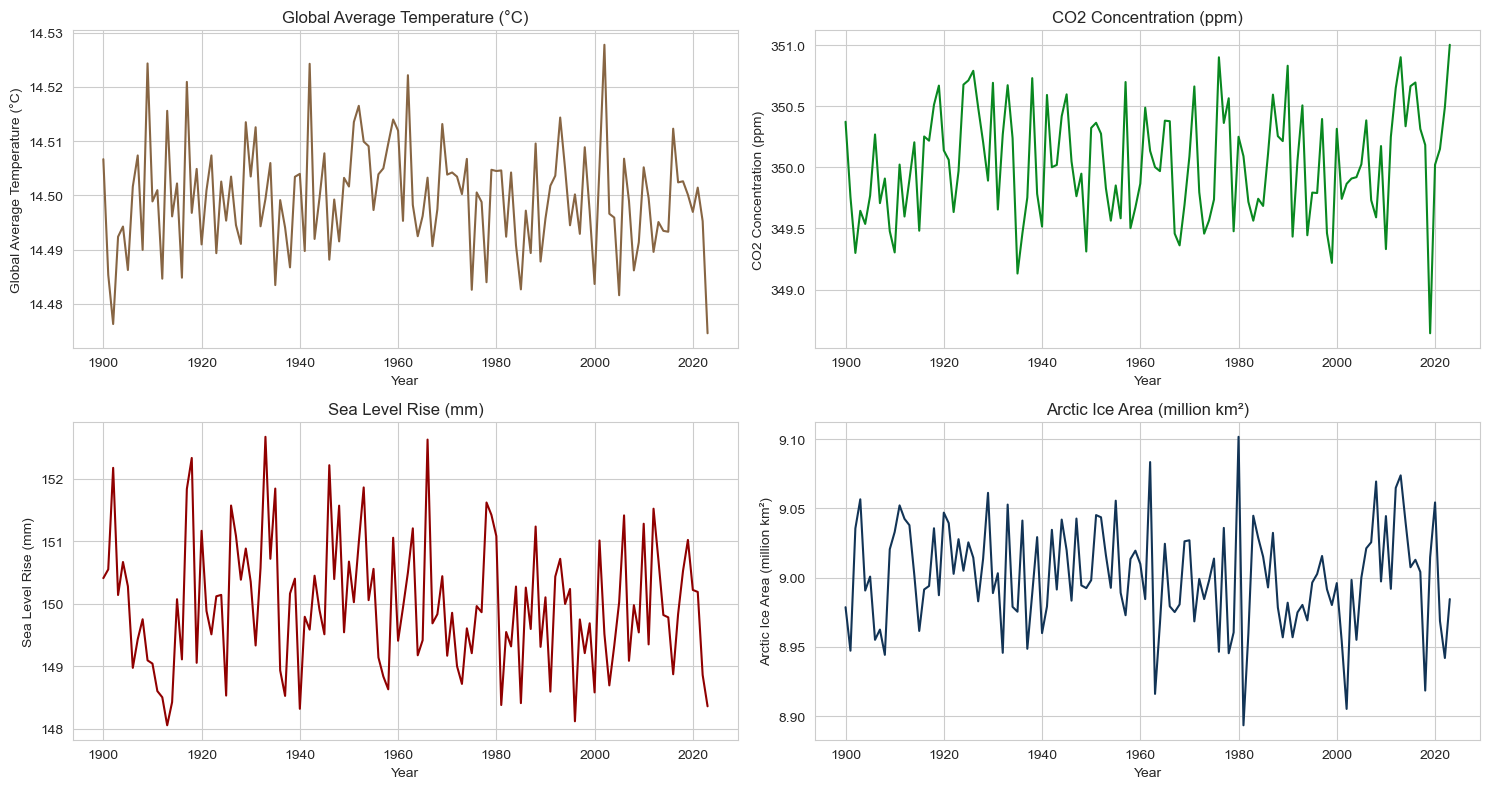

In [101]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
print("Bivariate analysis on different variables against Year(Time):")
print("Lineplot:")
fig, axes = plt.subplots(2, 2, figsize=(15,8))

#Lineplot for Global average temperature vs Year
sns.lineplot(data=yearly_data, x="Year", y=temperature, ax=axes[0,0], color="#876543")
axes[0,0].set_title(temperature)

#Lineplot for Co2 Concentration vs Year
sns.lineplot(data=yearly_data, x="Year", y=co2, ax=axes[0,1], color="#098820")
axes[0,1].set_title(co2)

#Lineplot for Sea Level rise vs Year
sns.lineplot(data=yearly_data, x="Year", y=sea_level, ax=axes[1,0], color="#900000")
axes[1,0].set_title(sea_level)

#Lineplot for Arctic Ice Area vs Year
sns.lineplot(data=yearly_data, x="Year", y=area, ax=axes[1,1], color="#123456")
axes[1,1].set_title(area)

plt.tight_layout()
plt.show()



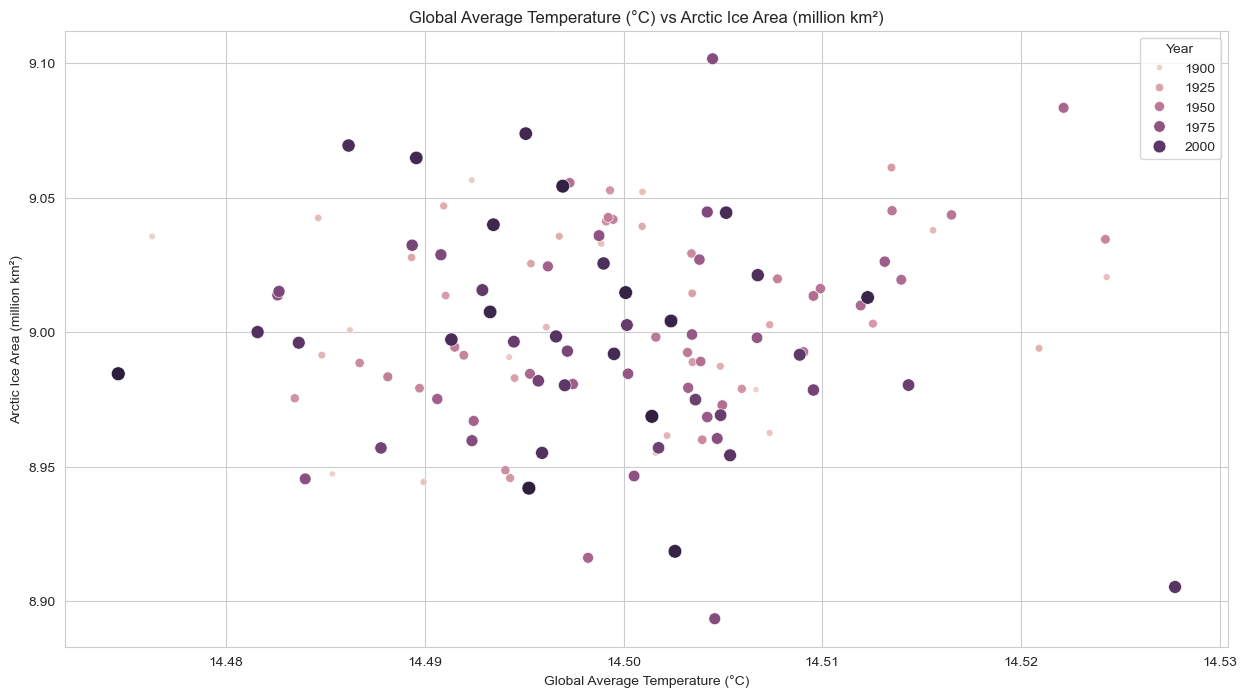

In [102]:
#ploting scatter plot between temperature and arctic area
plt.figure(figsize=(15,8))
sns.scatterplot(data=yearly_data, x=temperature, y=area, hue=year, size=year, sizes=(20,100))
plt.title(f"{temperature} vs {area}")
plt.show()

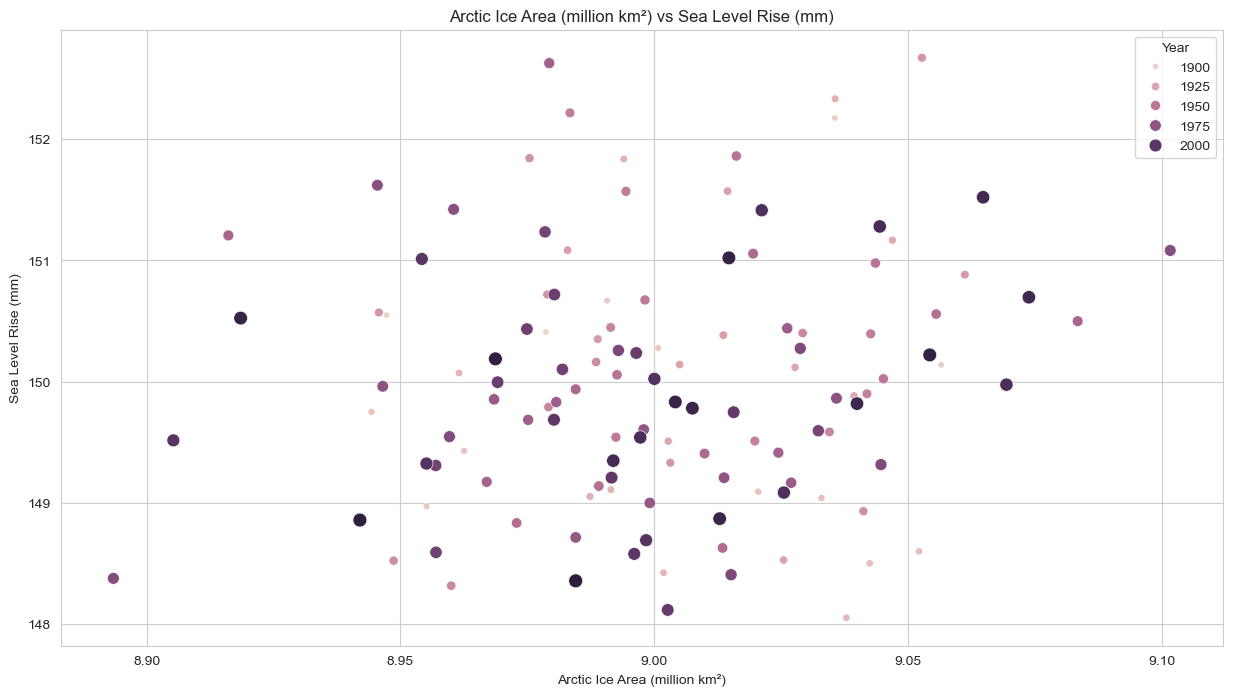

In [105]:
#ploting scatter plot between temperature and arctic area
plt.figure(figsize=(15,8))
sns.scatterplot(data=yearly_data, x=area, y=sea_level, hue=year, size=year, sizes=(20,100))
plt.title(f"{area} vs {sea_level}")
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [1]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here



Bivariate analysis on different variables against Year(Time):
Lineplot:


## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here